In [103]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.datasets import load_wine
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import linkage, dendrogram

Завантажимо датасет **wine**:

In [105]:
wine_df = datasets.load_wine()

Реалізуємо кластеризацію методом k-середніх та відобразимо її графічно:

In [106]:
model = KMeans(n_clusters=3)

In [107]:
model.fit(wine_df.data)

KMeans(n_clusters=3)

In [46]:
predictions = model.predict(wine_df.data)

In [47]:
print(predictions)

[1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 0 0 1 1 0 1 1 1 1 1 1 0 0
 1 1 0 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 0 2 2 0 2 2 0 0 0 2 2 1
 0 2 2 2 0 2 2 0 0 2 2 2 2 2 0 0 2 2 2 2 2 0 0 2 0 2 0 2 2 2 0 2 2 2 2 0 2
 2 0 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 0 2 2 0 0 0 0 2 2 2 0 0 2 2 0 0 2 0
 0 2 2 2 2 0 0 0 2 0 0 0 2 0 2 0 0 2 0 0 0 0 2 2 0 0 0 0 0 2]


In [48]:
cluster_0 = wine_df.data[predictions == 0]
cluster_1 = wine_df.data[predictions == 1]
cluster_2 = wine_df.data[predictions == 2]

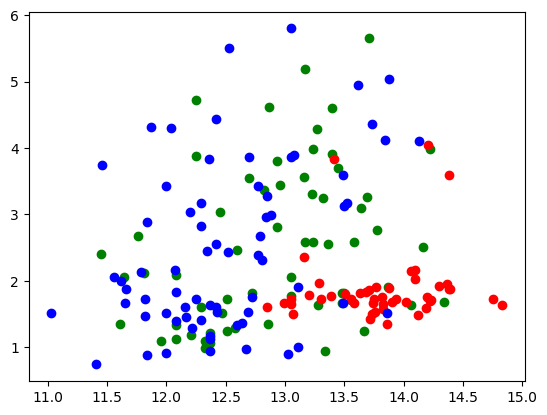

In [49]:
plt.scatter(cluster_0[:,0], cluster_0[:,1], color = 'green')
plt.scatter(cluster_1[:,0], cluster_1[:,1], color = 'red')
plt.scatter(cluster_2[:,0], cluster_2[:,1], color = 'blue')


Реалізуємо кластеризацію методом DBSCAN:

In [98]:
dbscan = DBSCAN(eps=0.6, min_samples=4)

In [99]:
dbscan.fit(wine_df.data)

DBSCAN(eps=0.6, min_samples=4)

Візуалізуємо DBSCAN:

In [100]:
pca = PCA(n_components=2).fit(wine_df.data)
pca_2d = pca.transform(wine_df.data)

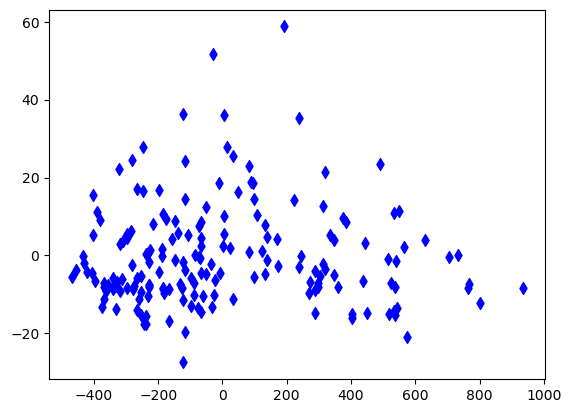

In [101]:
for i in range(0, pca_2d.shape[0]):
    if dbscan.labels_[i] == 0:
        c1 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='y', marker='+')
    elif dbscan.labels_[i] == 1:
        c2 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='g', marker='o')
    elif dbscan.labels_[i] == 2:
        c3 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='r', marker='*')
    elif dbscan.labels_[i] == -1:
        c3 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='b', marker='d')

Реалізуємо ієрархічну кластеризацію та відобразимо її за допомогою дендрограми:

In [108]:
mergings = linkage(wine_df.data, method = 'complete')

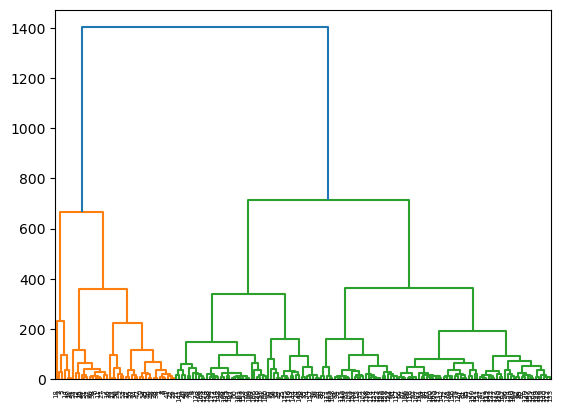

In [116]:
dendrogram(mergings, leaf_rotation=90)
plt.show()
